# Two Layer Neuron Network ( 3 input nodes * 4 nodes in hidden laywer * 1 output node)

In [1]:
import numpy as np

In [86]:
inputs = np.array([[0.0, 0.0, 1.0], [0.0, 1.0, 1.0], [1.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0],
                   [1.0, 1.0, 1.0], [0.0, 0.0, 0.0]])
inputs

array([[0., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.]])

In [16]:
outputs = np.array([[0, 1, 1, 1, 1, 0, 0]]).T
outputs

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [6]:
layer1_nodes = 3
layer2_nodes = 4
layer3_nodes = 1

In [106]:
L1_weights = np.random.random((layer1_nodes,layer2_nodes))
L1_weights

array([[0.31789953, 0.95784869, 0.00508716, 0.48461113],
       [0.19211304, 0.45136503, 0.59047872, 0.08335211],
       [0.18779086, 0.83744721, 0.65599913, 0.55558461]])

In [107]:
L2_weights = np.random.random((layer2_nodes,layer3_nodes))
L2_weights

array([[0.53911787],
       [0.91258789],
       [0.2410005 ],
       [0.98322771]])

In [12]:
#defint learning rate 
learnin_rate = 0.05

In [13]:
#define activation function

def sigmiod(x):
    return 1 / (1+np.exp(-x))

def sigmiod_derivative (x):
    return x * ( 1- x )

In [108]:
# train the neuron network

for iternation in range(10000):
    L1_output = sigmiod(np.dot(inputs,L1_weights))
    L2_output = sigmiod(np.dot(L1_output,L2_weights))
    #L2 learing
    L2_error = L2_output - outputs
    L2_delta = L2_error * sigmiod_derivative(L2_output)
    L2_weights -= learnin_rate * np.dot(L1_output.T,L2_delta)
    L2_derivative = np.dot(L2_delta,L2_weights.T)
    L1_output -= learnin_rate * L2_derivative
    #L1 learing
    L1_delta = L2_derivative * sigmiod_derivative(L1_output)
    L1_weights -= learnin_rate * np.dot(inputs.T,L1_delta)
    L1_derivative = np.dot(L1_delta,L1_weights.T)
    inputs -= learnin_rate * L1_derivative

In [115]:
L1_weights

array([[ 0.80090738,  1.31527868, -1.4445158 ,  1.22029776],
       [ 0.61951016,  0.76405729, -0.62478644,  0.7360604 ],
       [ 0.51909365,  1.08064125, -0.31113087,  1.06077026]])

In [116]:
L2_weights

array([[ 0.59762827],
       [ 2.12387498],
       [-4.03814448],
       [ 1.90841525]])

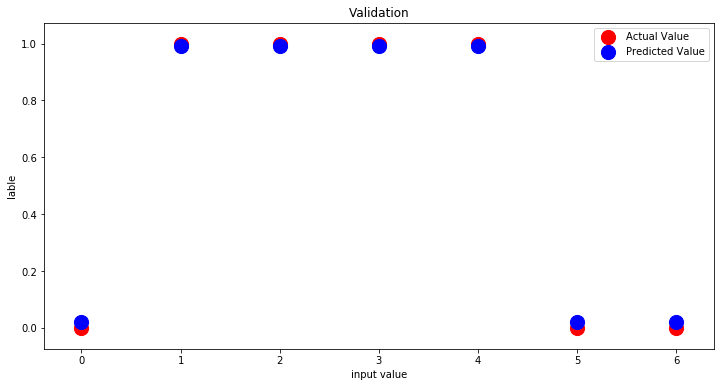

In [114]:
x_data = list(range(7))
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(x_data, outputs, c='r',s=200, label='Actual Value')
plt.scatter(x_data, L2_output, c='b', s=200,label='Predicted Value')
plt.xlabel('input value')
plt.ylabel('lable')
plt.title('Validation')
plt.legend()
plt.show()